# Taller S.O.S. (Software de Observaciones Sintéticas)

## Simulaciones numéricas como laboratorios virtuales: conectando teoría y observaciones
### Documentación próximamente disponible en [link](https://github.com/MarcialX/sos).

### Este código analiza los cubos de datos simulados de una nube filamentaria, y a partir de observaciones de $^{12}$CO, $^{13}$CO y C$^{18}$O se obtienen propiedades físicas de una Nube Molecular prototipo.

## Instrucciones para correr S.O.S.:

## Parte 2: Medición del Campo Magnético (en binnes) de la Nube Molecular:

El Campo Magnético ($B_{\rm pos}$) por el método de Chandrasekhar-Fermi esta dado por

$B_{\rm pos} \simeq 9.3 \sqrt{n({\rm H}_2)} \frac{\Delta v}{\sigma_\theta} \, \mu {\rm G}$

Donde $n({\rm H}_2)$ es la densidad numérica del gas, $\Delta v$ es el ancho de línea de la molécula $^{13}$CO y $\sigma_\theta$ es la dispersión de los ángulos de polarización.

### De ser necesario, nos cambiamos al directorio de trabajo:

In [ ]:
#import os
#os.chdir("/ruta/al/paquete/sos")

### Importamos el paquete sos:

In [1]:
import sos

In [2]:
## Creamos la nube molecular
mc = sos.mc('MC76')

INFO. Loading data base
Data base loaded
13CO binned initiated
12CO binned initiated
C18O binned initiated
INFO. Loading object parameters
Parameters loaded
INFO. Loading 13CO map
13CO map loaded
INFO. Loading 12CO map
12CO map loaded
INFO. Loading C18O map
C18O map loaded
INFO. Loading Polaritzation map
Polarization map loaded


/home/marcial/Documents/sos/sos/mc_db_tools.py:49: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  mc_db = yaml.load(file)
/home/marcial/Documents/sos/sos/physics.py:191: RuntimeWarning: invalid value encountered in sqrt
  fyz = 2*np.sqrt(r**2 - y**2 - z**2)


Volume calculated


### Cargamos el respaldo de la sección anterior:

In [4]:
mc.load_bkp('./sos/bkp/Parte_1/')

Molecular cloud full and binned data loaded
Molecular cloud data and header loaded
Molecular cloud polarization data loaded
Molecular cloud parameters loaded


## Dispersión de los ángulos de polarización

### Obtenemos los parámetros de Stokes I,Q,U,V:

In [5]:
mc.get_pol_params()

INFO. Getting Stokes parameters
Done


### Se crean los bines de polarización. Como se retoma la división hecha con las moléculas, 'rebin'=False

In [6]:
mc.binning_pol(rebin=False)

INFO. Binning complete


### Graficamos ángulos y grados de polarización

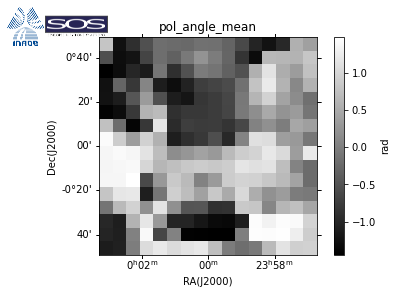

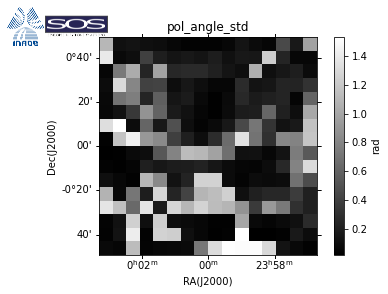

In [7]:
mc_binned = mc.mc_binned
m0_data_13co, m0_header_13co = mc.M0('13CO', save=False)
plt = sos.mc_plotter(mc_binned, m0_data_13co, m0_header_13co)
plt.map_param('pol_angle_mean', cmap='gist_gray', log=False)
plt.map_param('pol_angle_std', cmap='gist_gray', log=False)

## Densidad volumétrica

### Obtenemos la densidad volumétrica de cada bin:

In [8]:
mc.get_vol_den('mass_lte', 'binned')

INFO. Calculating Volumetric densities
Done


/home/marcial/Documents/sos/sos/mc.py:1220: RuntimeWarning: invalid value encountered in double_scalars
  self.mc_binned[bin]['den'] = self.mc_binned[bin][mass_method]/self.mc_binned[bin]['vol']


### Graficamos la densidad volumétrica

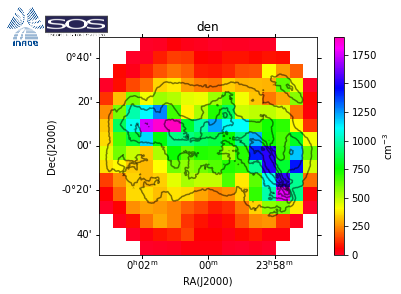

In [9]:
mc_binned = mc.mc_binned
plt = sos.mc_plotter(mc_binned, m0_data_13co, m0_header_13co)
plt.map_param('den', cmap='gist_rainbow', log=False, contour=True)

16 16


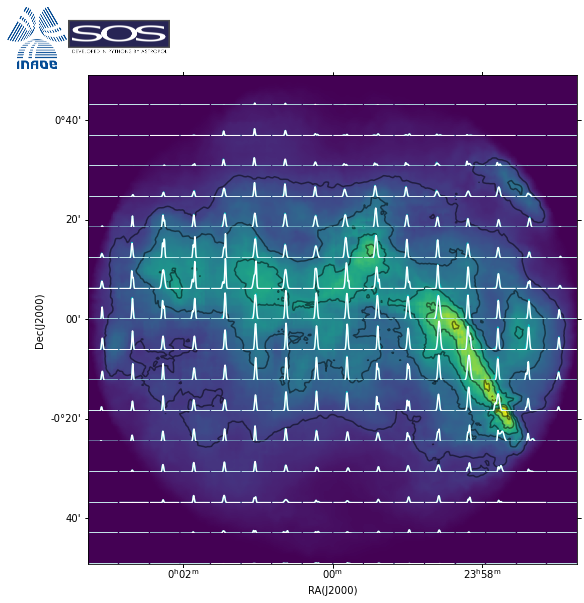

In [10]:
plt.plot_m0_line('13CO')

## Campo magnético

### Calculamos el campo magnético:

In [19]:
mc.get_mag_field('13CO')

INFO. Calculating magnetic field (Chandrasekhar-Fermi method)
Magnetic field (Perpendicular component) calculated


In [20]:
for b in mc.mc_binned.keys():
    mc.mc_binned[b]['B'] = mc.mc_binned[b]['B']/2.3548

### Graficamos el campo magnético:

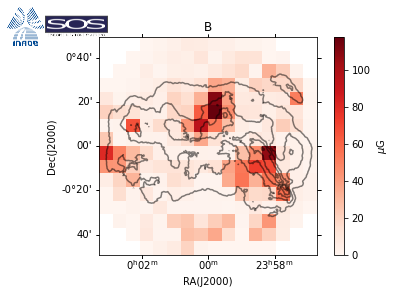

In [21]:
# Graficar resultados
mc_bins = mc.mc_binned
plt = sos.mc_plotter(mc_bins, m0_data_13co, m0_header_13co)
plt.map_param('B', cmap='Reds', log=False, contour=True)

Total bin sum of mass_lte: 67030.35248745562


67030.35248745562

/home/marcial/Documents/sos/sos/mc_plotter.py:181: RuntimeWarning: divide by zero encountered in log10
  m_param = np.log10(m_param)


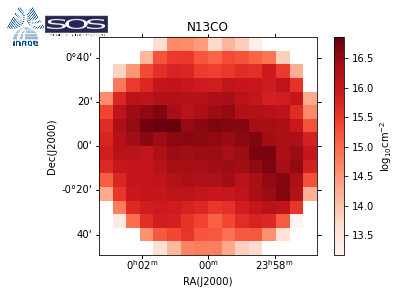

In [22]:
plt.map_param('N13CO', cmap='Reds', contour=True)

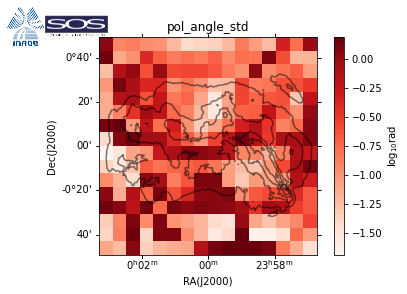

In [23]:
plt.map_param('pol_angle_std', cmap='Reds', contour=True)

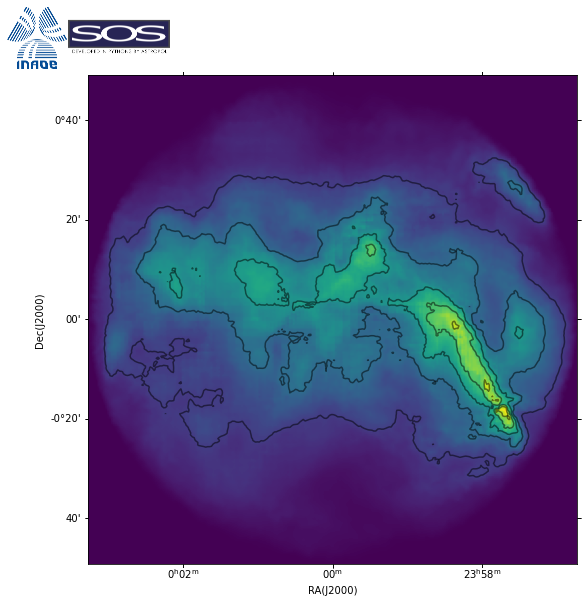

In [26]:
plt.plot_m0('13CO')

16 16


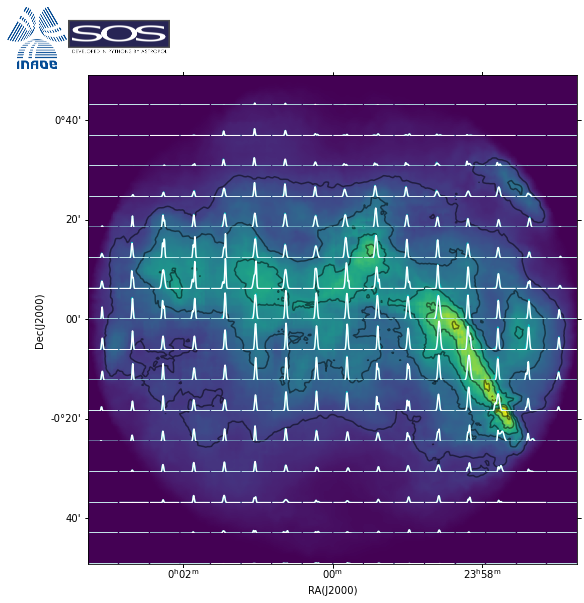

In [27]:
plt.plot_m0_line('13CO')

/home/marcial/Documents/sos/sos/mc_plotter.py:181: RuntimeWarning: invalid value encountered in log10
  m_param = np.log10(m_param)


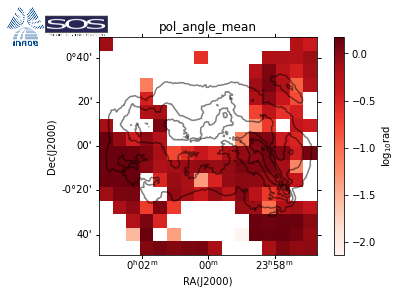

In [28]:
plt.map_param('pol_angle_mean', cmap='Reds', contour=True)

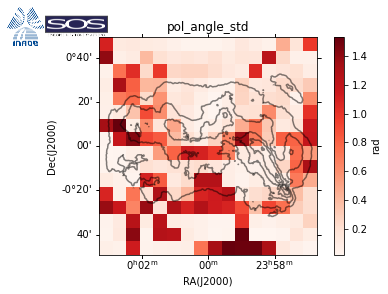

In [29]:
plt.map_param('pol_angle_std', cmap='Reds', contour=True, log=False)

/home/marcial/Documents/sos/sos/mc_plotter.py:181: RuntimeWarning: invalid value encountered in log10
  m_param = np.log10(m_param)


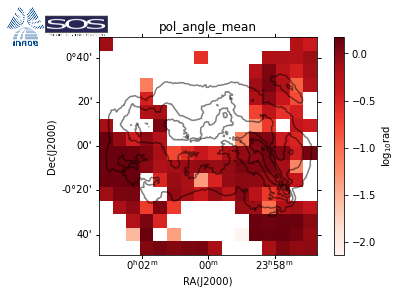

In [30]:
plt.map_param('pol_angle_mean', cmap='Reds', contour=True)

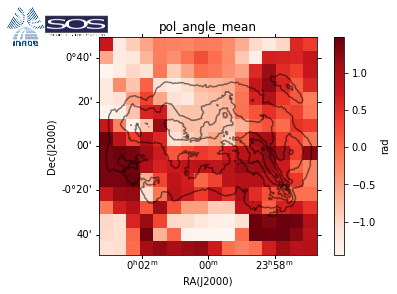

In [31]:
plt.map_param('pol_angle_mean', cmap='Reds', contour=True, log=False)

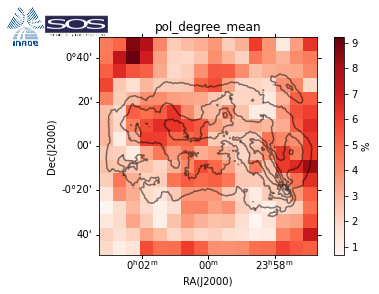

In [32]:
plt.map_param('pol_degree_mean', cmap='Reds', contour=True, log=False)

16 16


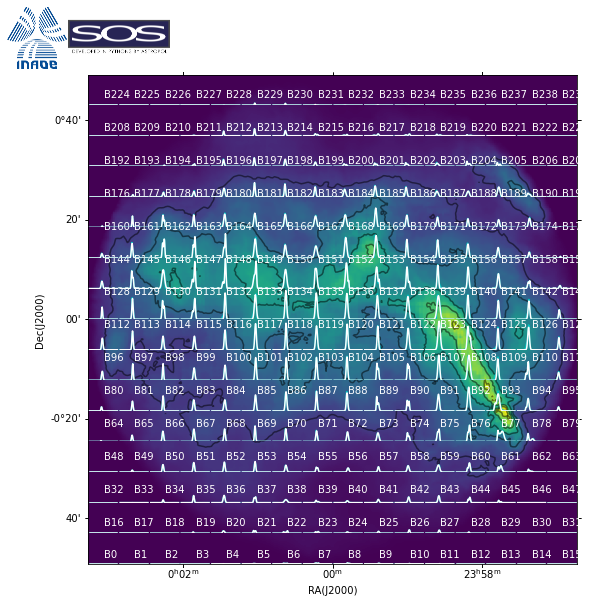

In [34]:
plt.plot_m0_line('13CO',label=True)